Read File using Kaggle API

In [ ]:
from google.colab import files

#files.upload()

Saving kaggle.json to kaggle (6).json


{'kaggle (6).json': b'{"username":"ferrelnathanael","key":"24a5e0df44b44373775cddb34dcd1f77"}'}

In [ ]:
# Make kaggle directory
!mkdir -p ~/.kaggle

# Copy kaggle.json ke direktori
!cp kaggle.json ~/.kaggle/

# Give access to file
!chmod 600 ~/.kaggle/kaggle.json

# Download via API
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

# Automatic overwrite
!unzip -o craigslist-carstrucks-data.zip

Dataset URL: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
License(s): CC0-1.0
craigslist-carstrucks-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
import pandas as pd
import numpy as np

# Show all columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('vehicles.csv')

In [ ]:
display(df.head())

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
display(df.describe())

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


# Data Cleaning

In [ ]:
df_cleaned = df.copy()

# Delete unrelevant columns
columns_to_drop = ['id', 'url', 'region_url', 'vin', 'image_url', 'description', 'county', 'state']
columns_that_exist = [col for col in columns_to_drop if col in df_cleaned.columns]

df_cleaned = df_cleaned.drop(columns=columns_that_exist)
print(f"Jumlah kolom sekarang: {df_cleaned.shape[1]}")

Jumlah kolom sekarang: 19


In [ ]:
print(f"\nJumlah baris duplikat ditemukan: {df_cleaned.duplicated().sum()}")
df_cleaned = df_cleaned.drop_duplicates()

print(f"Jumlah total baris sekarang: {df_cleaned.shape[0]}")


Jumlah baris duplikat ditemukan: 37
Jumlah total baris sekarang: 426843


In [ ]:
# Hitung jumlah mobil dengan harga $0
zero_price_count = df_cleaned[df_cleaned['price'] == 0].shape[0]
print(f"Jumlah mobil dengan harga $0: {zero_price_count}")

# Tampilkan 10 harga termahal untuk melihat outlier
print("\n10 Harga Termahal:")
display(df_cleaned['price'].value_counts().sort_index(ascending=False).head(10))

Jumlah mobil dengan harga $0: 32890

10 Harga Termahal:


,count
price,
3736928711,2
3024942282,2
3009548743,1
1410065407,1
1234567890,1
1111111111,2
987654321,2
135008900,1
123456789,6


In [ ]:
rows_before = df_cleaned.shape[0]

df_cleaned = df_cleaned[(df_cleaned['price'] >= 1000) & (df_cleaned['price'] <= 1000000)]

rows_after = df_cleaned.shape[0]

print(f"Jumlah baris sebelum filter harga: {rows_before}")
print(f"Jumlah baris setelah filter harga: {rows_after}")
print(f"Jumlah baris yang dibuang: {rows_before - rows_after}")

Jumlah baris sebelum filter harga: 426843
Jumlah baris setelah filter harga: 380485
Jumlah baris yang dibuang: 46358


In [ ]:
display(df_cleaned['price'].describe())

,price
count,380485.000000
mean,19588.869164
std,16181.426082
min,1000.000000
25%,7990.000000
50%,15990.000000
75%,27990.000000
max,1000000.000000


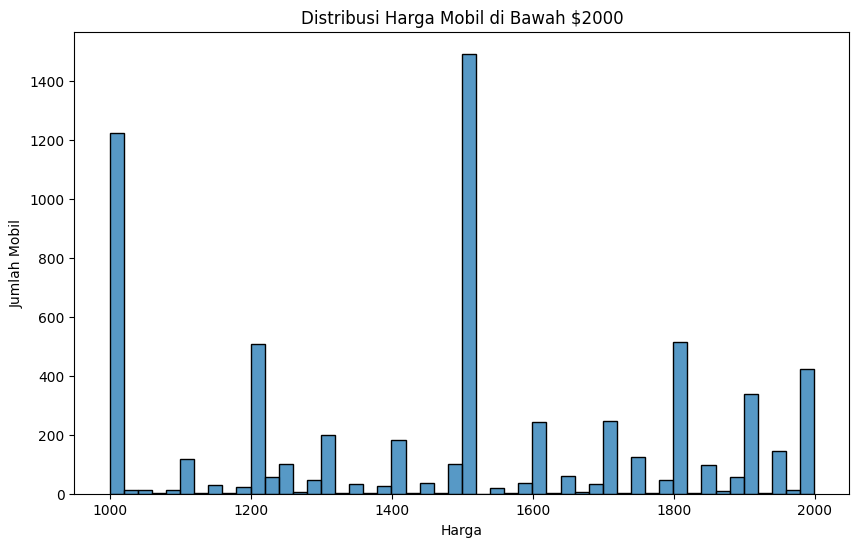

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

low_price_cars = df_cleaned[(df_cleaned['price'] > 0) & (df_cleaned['price'] < 2000)]

plt.figure(figsize=(10, 6))
sns.histplot(low_price_cars['price'], bins=50)
plt.title('Distribusi Harga Mobil di Bawah $2000')
plt.xlabel('Harga')
plt.ylabel('Jumlah Mobil')
plt.show()

In [ ]:
# Hitung persentase nilai kosong untuk setiap kolom
missing_percentage = df_cleaned.isnull().sum() / len(df_cleaned) * 100

# Tampilkan hasilnya, diurutkan dari yang terbesar
print("Persentase nilai kosong di setiap kolom:")
print(missing_percentage.sort_values(ascending=False))

Persentase nilai kosong di setiap kolom:
size            71.784170
cylinders       40.804762
VIN             38.429110
condition       37.690053
drive           30.286871
paint_color     28.600602
type            21.343286
manufacturer     3.982023
title_status     1.720699
model            1.170086
long             0.906212
lat              0.906212
fuel             0.679659
odometer         0.544831
transmission     0.475971
year             0.304611
posting_date     0.014192
price            0.000000
region           0.000000
dtype: float64


In [ ]:
# Simpan jumlah baris sebelum dihapus
rows_before = df_cleaned.shape[0]

# 1. Hapus kolom 'size' karena terlalu banyak data kosong
df_cleaned = df_cleaned.drop(columns=['size'])
print("✅ Kolom 'size' dihapus.")

# 2. Hapus baris di mana kolom-kolom penting ini kosong
df_cleaned = df_cleaned.dropna(subset=['year', 'manufacturer', 'model', 'odometer'])
print("✅ Baris dengan data penting (year, manufacturer, model, odometer) yang kosong dihapus.")

rows_after = df_cleaned.shape[0]
print(f"\nJumlah baris yang dihapus: {rows_before - rows_after}")


# 3. Cek ulang persentase missing values
print("\nPersentase missing values setelah aksi pertama:")
missing_percentage_after = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print(missing_percentage_after.sort_values(ascending=False))

✅ Kolom 'size' dihapus.
✅ Baris dengan data penting (year, manufacturer, model, odometer) yang kosong dihapus.

Jumlah baris yang dihapus: 21517

Persentase missing values setelah aksi pertama:
cylinders       40.595819
condition       37.705032
VIN             37.349569
drive           29.912137
paint_color     28.247643
type            20.613815
title_status     1.634408
long             0.923202
lat              0.923202
fuel             0.547124
transmission     0.406443
region           0.000000
price            0.000000
model            0.000000
odometer         0.000000
year             0.000000
manufacturer     0.000000
posting_date     0.000000
dtype: float64


In [ ]:
# 1. Hapus kolom VIN
if 'VIN' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['VIN'])
    print("✅ Kolom 'VIN' dihapus.")

# 2. Isi kolom KATEGORIKAL dengan MODUS (nilai paling umum)
categorical_cols_to_fill = [
    'cylinders', 'condition', 'drive', 'paint_color',
    'type', 'title_status', 'fuel', 'transmission'
]

for col in categorical_cols_to_fill:
    mode = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode, inplace=True)
    print(f"✅ Nilai kosong di '{col}' diisi dengan modus: '{mode}'")

# 3. Isi kolom NUMERIK dengan MEDIAN (nilai tengah)
numerical_cols_to_fill = ['lat', 'long']

for col in numerical_cols_to_fill:
    median = df_cleaned[col].median()
    df_cleaned[col].fillna(median, inplace=True)
    print(f"✅ Nilai kosong di '{col}' diisi dengan median: {median}")

# 4. Verifikasi Final - Pastikan tidak ada nilai kosong tersisa
print("\n--- Pengecekan Final Nilai Kosong ---")
print(df_cleaned.isnull().sum())

✅ Kolom 'VIN' dihapus.
✅ Nilai kosong di 'cylinders' diisi dengan modus: '6 cylinders'
✅ Nilai kosong di 'condition' diisi dengan modus: 'good'
✅ Nilai kosong di 'drive' diisi dengan modus: '4wd'
✅ Nilai kosong di 'paint_color' diisi dengan modus: 'white'


/tmp/ipython-input-1191842167.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode, inplace=True)


✅ Nilai kosong di 'type' diisi dengan modus: 'sedan'
✅ Nilai kosong di 'title_status' diisi dengan modus: 'clean'
✅ Nilai kosong di 'fuel' diisi dengan modus: 'gas'
✅ Nilai kosong di 'transmission' diisi dengan modus: 'automatic'
✅ Nilai kosong di 'lat' diisi dengan median: 39.1966585
✅ Nilai kosong di 'long' diisi dengan median: -87.9787

--- Pengecekan Final Nilai Kosong ---


/tmp/ipython-input-1191842167.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median, inplace=True)


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
lat             0
long            0
posting_date    0
dtype: int64
